## DATA WRANGLING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
happy_df=pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
happy_df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

In [4]:
# rename columns to a user readable format
old_name = list(happy_df.columns)
new_name = ['happiness','delivered_OnTime', 'order_satisfaction', 'order_completed', 'price_satisfaction', 
            'courier_satisfaction', 'app_satisfaction']

happy_df.rename(columns = (dict(zip(old_name, new_name))), inplace = True)
happy_df.head()

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
happy_df.shape

(126, 7)

In [6]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   happiness             126 non-null    int64
 1   delivered_OnTime      126 non-null    int64
 2   order_satisfaction    126 non-null    int64
 3   order_completed       126 non-null    int64
 4   price_satisfaction    126 non-null    int64
 5   courier_satisfaction  126 non-null    int64
 6   app_satisfaction      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [7]:
happy_df.describe(include = "all")

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The data has the appropriate dtype and is not missing any values or has any inconsistencies.

Based on a cursory glance of the descriptive statistics, we can see that the lowest rating is order satisfaction. Delivery time, app satisfaction, courier satisfaciton, price satisfaction on average skew to higher ratings, but order completeness is pretty neutral. There seems to be very little difference between happy and unhappy customers.

In conclusion, both order satisfaction and order completeness need to be improved. We will explore all this more visually in the next section.

In [8]:
for i in happy_df.columns:
    print(f'{i}: {happy_df[i].unique()}')

happiness: [0 1]
delivered_OnTime: [3 5 4 1]
order_satisfaction: [3 2 4 5 1]
order_completed: [3 2 4 5 1]
price_satisfaction: [4 5 3 2 1]
courier_satisfaction: [2 4 3 5 1]
app_satisfaction: [4 3 5 2 1]


## EXPLORATORY DATA ANALYSIS

In [9]:
# Create our features
y = happy_df["happiness"]
X = happy_df.drop("happiness", axis=1)
X

,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


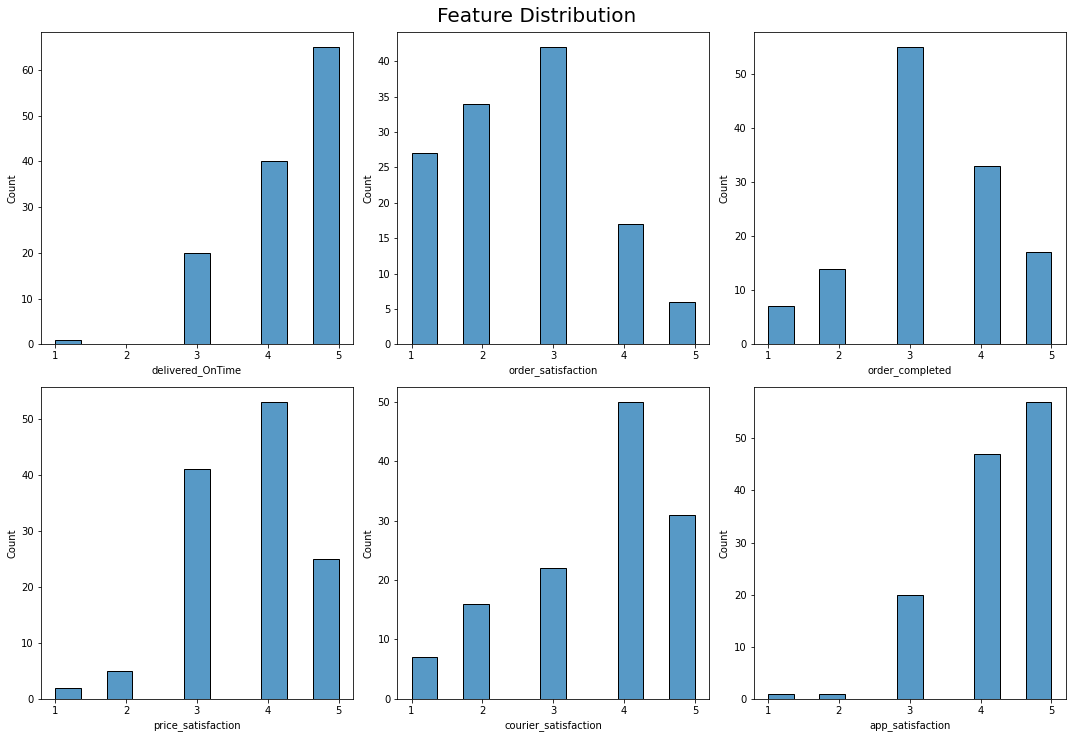

In [10]:
#plot feature distribution
feature = X.copy().iloc[:, 0:6]

plt.figure(figsize=(15, 10))

for i in range(len(feature.columns)):
    ax = plt.subplot(int(len(feature.columns)/3 ), 3,  i + 1)
    _ = sns.histplot(data=X, x=feature.columns[i], ax=ax)
    _ = plt.ylabel('Count')
    _ = plt.tight_layout()
    _= ax.set_xticks([1, 2, 3, 4, 5])

_ = plt.suptitle(f'Feature Distribution', y=1.02, size=20)
_ = plt.show()

Now let's formally look at how skewed each feature is.

For skewness, we will consider a rule of thumb that a score between -0.5 and 0.5 is fairly symmetrical. Anything outside of those bounds we will consider for scaling and transformation.

In [11]:
## skewness and kurtosis

print("Skewness: ", "\n", happy_df.skew())
print(" ")
print("Kurtosis: ", "\n", happy_df.kurtosis())

Skewness:  
 happiness              -0.193659
delivered_OnTime       -1.058468
order_satisfaction      0.271000
order_completed        -0.199536
price_satisfaction     -0.422240
courier_satisfaction   -0.699999
app_satisfaction       -0.957590
dtype: float64
 
Kurtosis:  
 happiness              -1.994412
delivered_OnTime        1.024968
order_satisfaction     -0.601168
order_completed        -0.111410
price_satisfaction      0.278617
courier_satisfaction   -0.306418
app_satisfaction        0.941835
dtype: float64


Based on the above distributions we can see that most of the features are not normally distributed:

- order_completed and order_satisfaction look normally distributed and are fairly symmetrical.
- price_satisfaction is skewed left, but is otherwise symmetrical and falls within the bounds we are considering for skewness.
- delivered_time, courier_satisfaction, and app_satisfaction are all moderately skewed left amd will need to be transformed.

There are slightly more happy than unhappy customers. Otherwise, this is also fairly symmetrical.

In [12]:
happiness_mean = pd.DataFrame(data = {1 : list(happy_df[happy_df.happiness == 1].describe().T['mean']), 
                                      0 : list(happy_df[happy_df.happiness == 0].describe().T['mean'])},
                              index = new_name)
happiness_mean.T

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
1,1.0,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812
0,0.0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263


When we break down the average rating by happy and unhappy customers, we can confirm again that order_satisfaction and order_completed seriously needs to be improved because even happy customers are rating that there orders are not correct. We can drop order_satisfaction as this won't add any value to the model in predicting customer happiness.

Let's break this out for the rest of the features.

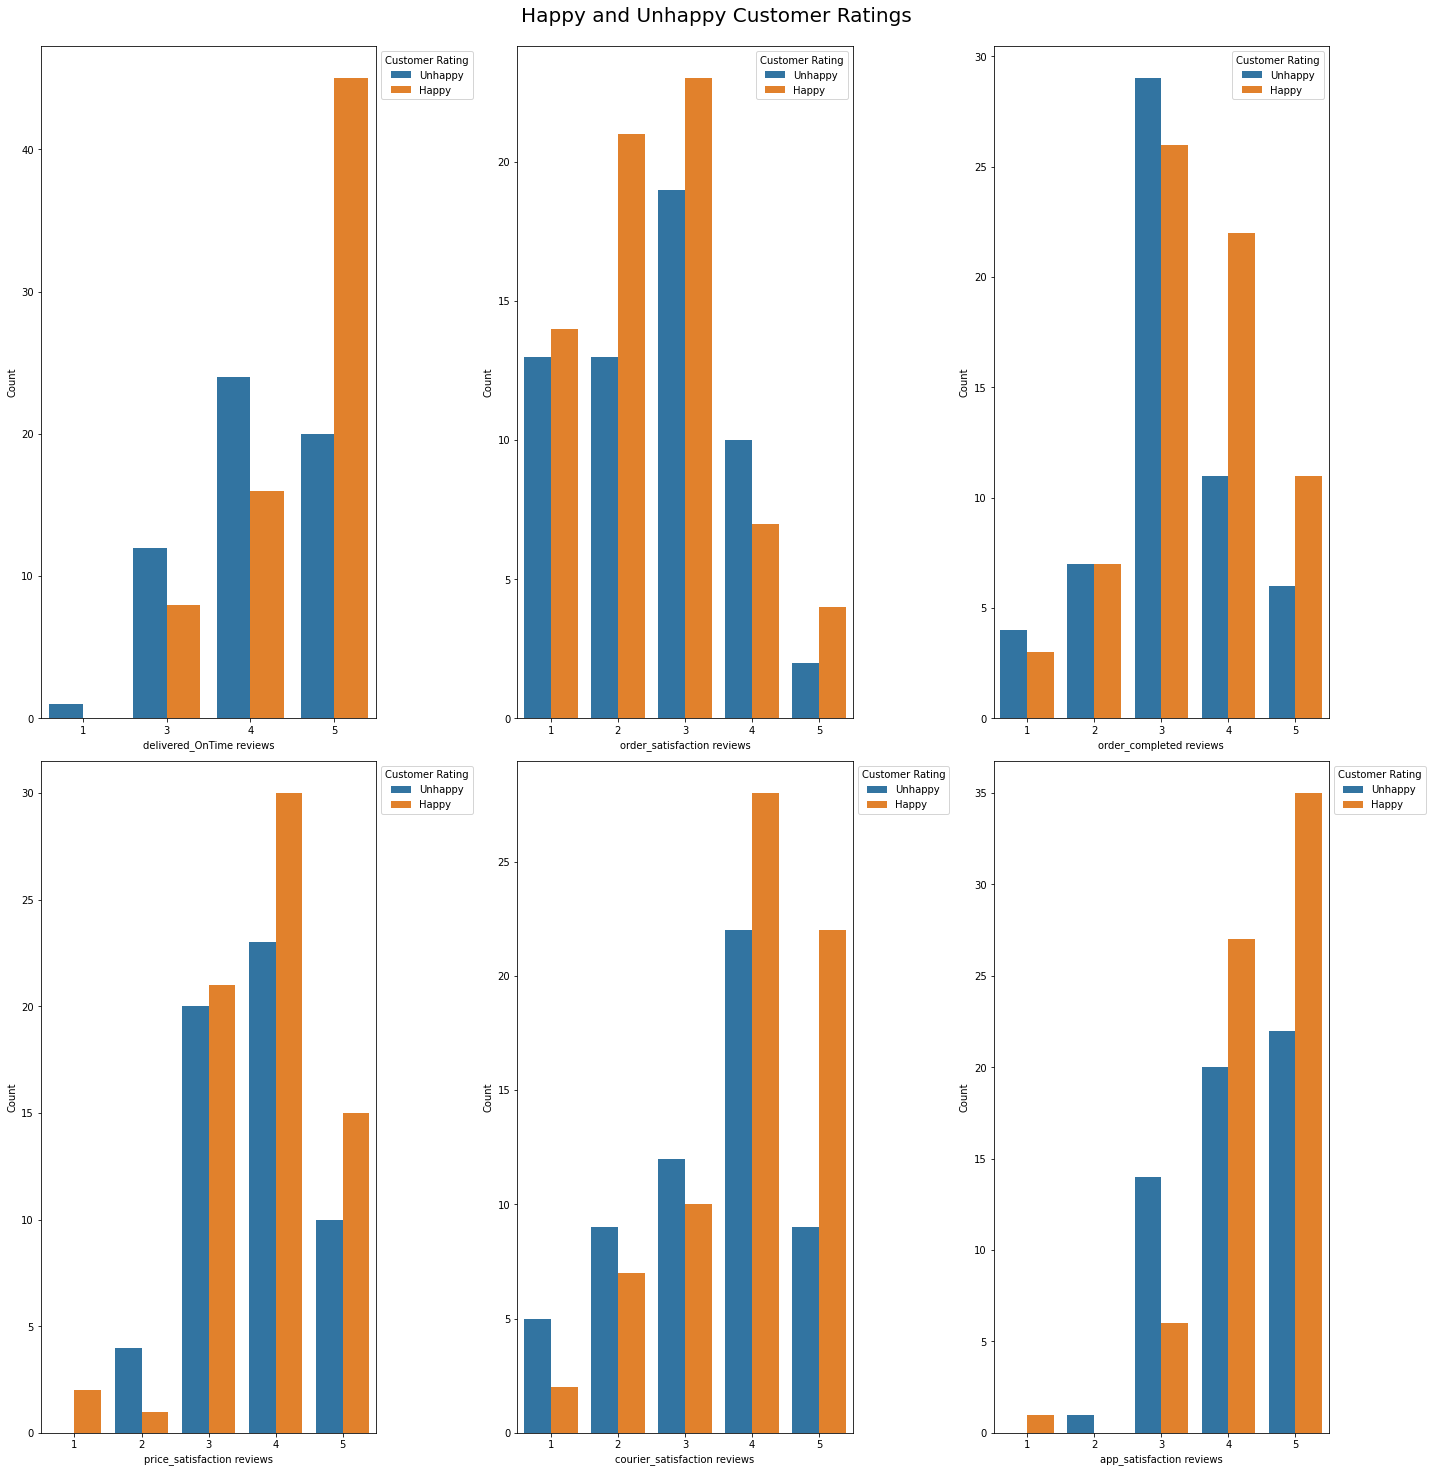

In [13]:
data = X.copy().iloc[:, 0:6]

plt.figure(figsize=(20, 20))

for i in range(len(data.columns)):
    ax = plt.subplot(int(len(data.columns) / 3), 3, i + 1)
    arr = sns.countplot(data=happy_df, x=data.columns[i], ax=ax, hue='happiness')
    legend_labels, _= ax.get_legend_handles_labels()
    _ = arr.legend(legend_labels, ['Unhappy','Happy'], bbox_to_anchor=(1,1), title='Customer Rating')
    _ = plt.xlabel(f'{data.columns[i]} reviews')
    _ = plt.ylabel('Count')
_ = plt.tight_layout()
_ = plt.suptitle(f'Happy and Unhappy Customer Ratings', y=1.02, size=20)
_ = plt.show()

We can see above when we break down the ratings for order_satisfaction, that even customers who are happy still rate 3 stars and below. This won't help us with our model. All other features look useful and can be included.

Let's take a look at the correlation of features to see if there are any features we can drop from our dataset.

In [14]:
## Check Multicollinearity

happy_df.corr(method = "pearson")

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
happiness,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
delivered_OnTime,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
order_satisfaction,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
order_completed,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
price_satisfaction,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
courier_satisfaction,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
app_satisfaction,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [15]:
## Check Multicollinearity

happy_df.corr(method = "pearson") > 0.85

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
happiness,True,False,False,False,False,False,False
delivered_OnTime,False,True,False,False,False,False,False
order_satisfaction,False,False,True,False,False,False,False
order_completed,False,False,False,True,False,False,False
price_satisfaction,False,False,False,False,True,False,False
courier_satisfaction,False,False,False,False,False,True,False
app_satisfaction,False,False,False,False,False,False,True


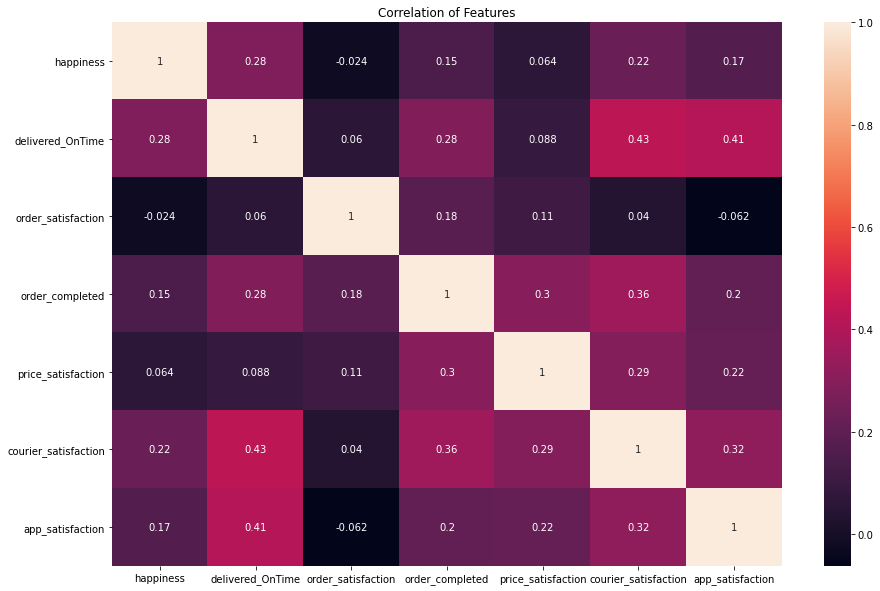

In [16]:
plt.subplots(figsize=(15,10))
plt.title('Correlation of Features')
sns.heatmap(happy_df.corr(), annot=True)
plt.show()


Based on the heatmap and distribution of happy and unhappy customers, we could drop order_satisfaction and price_satisfaction from our dataset. App satisfcation and courier satisfaction have a moderate correlation with delivered time which could be an issue if we choose to use a linear regression model.

However, based on the breakdown of customer reviews, customers that were happy did rate price_satisfaction much higher so we will keep this in the data as it could potentially help our model.

We can see that the data is imbalanced, with most ratings at 3, 4, and 5. There may also be potential issues with overfitting since the dataset is so small.

## PRE-PROCESSING

### Feature Engineering: Transformations

In [17]:
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

Based on what we learned about the features and distribution, we want to transform and reduce skewness before modeling the data on the following:

- delivered_time
- price_satisfaction
- courier_satisfaction
- app_satisfaction

We are considering scaling price satisfaction because it is close enough to being skewed and we want to see whether we can improve its correlation with happiness.

We will be using the following transformations to see which best reduces skewness in our data:

- log transformation
- square root transformation
- box-cox transformation

In [18]:
def skewness_score(df, func):
    
    #create a copy of df
    scaledf = df.copy()
    
    for i in df.columns:
        if (df[i].agg(['skew'])[0] > 0.3) | (df[i].agg(['skew'])[0] < -0.3):
            scale = func(df[i])
            if func == boxcox:
                scaledf[i] = scale[0]
            else:
                scaledf[i] = scale

    # measure for skewness
    print(scaledf.agg(['skew']).T)
    return scaledf

In [19]:
# original skew
happy_df.agg(['skew']).T

,skew
happiness,-0.193659
delivered_OnTime,-1.058468
order_satisfaction,0.271000
order_completed,-0.199536
price_satisfaction,-0.422240
courier_satisfaction,-0.699999
app_satisfaction,-0.957590


In [20]:
# log transformation
logdf = skewness_score(happy_df, np.log)

                          skew
happiness            -0.193659
delivered_OnTime     -2.509650
order_satisfaction    0.271000
order_completed      -0.199536
price_satisfaction   -1.783357
courier_satisfaction -1.553415
app_satisfaction     -2.373047


In [21]:
# square root transformation
sqrtdf = skewness_score(happy_df, np.sqrt)

                          skew
happiness            -0.193659
delivered_OnTime     -1.562586
order_satisfaction    0.271000
order_completed      -0.199536
price_satisfaction   -0.971423
courier_satisfaction -1.088021
app_satisfaction     -1.470749


Based on the following transformations so far, the log and square root transformations have only worsened the skewness. price_satisfaction was only slightly reduced under the square root transformation.

Let's try Box-Cox.

In [22]:
#box-cox transformation
boxcoxdf = skewness_score(happy_df, boxcox)

                          skew
happiness            -0.193659
delivered_OnTime     -0.381695
order_satisfaction    0.271000
order_completed      -0.199536
price_satisfaction   -0.052506
courier_satisfaction -0.274511
app_satisfaction     -0.278770


Box-Cox transformation significantly reduced skewness for all left skewed data. We will be using this transformation and making this our new dataset.

In [23]:
# use the box-cox transformation as our new dataset
df = boxcoxdf
df.head()

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
0,0,10.310459,3,3,4.619280,1.317663,15.062869
1,0,10.310459,2,3,6.704308,5.570104,6.752861
2,1,54.524775,3,3,2.775932,3.197320,27.741232
3,0,54.524775,4,3,2.775932,3.197320,27.741232
4,0,54.524775,4,3,2.775932,3.197320,27.741232


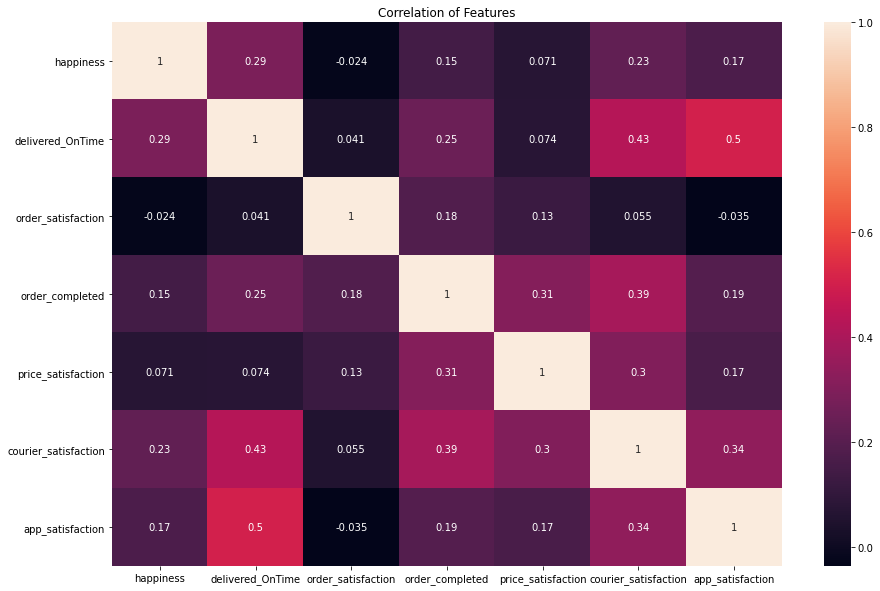

In [24]:
# compare new correlations
plt.subplots(figsize=(15,10))
plt.title('Correlation of Features')
sns.heatmap(df.corr(), annot=True)
plt.show()

price_satisfaction has slightly increased in correlation to happiness. For now we will look at 3 different datasets to see which one will perform best with the models:

- df1: dataset that includes all features except order_satisfaction and price_satisfaction
- df2: dataset that includes all features except order_satisfaction
- df3: dataset that includes all features

Because we've transformed the data and each rating is represented as a categorical variable instead of an integer, we need to create dummy variables for all features. We can exclude the target variable happiness.

In [25]:
# Check the balance of our target values
y.value_counts()

1    69
0    57
Name: happiness, dtype: int64

## split data into training and testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

### Model Review

Before we start choosing our models, we will use pycaret's automl to determine our top 3 performing models optimized for accuracy.

In [27]:
from pycaret.classification import *

In [28]:
clf1 = setup(happy_df, target = happy_df.columns[0], silent = True, verbose = False)
top5 = compare_models(n_select = 3) 
#find the best model
best = automl(optimize = 'Accuracy')
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6944,0.6988,0.6950,0.7617,0.6974,0.3942,0.4115,0.0600
catboost,CatBoost Classifier,0.6861,0.7062,0.7200,0.7405,0.6951,0.3703,0.3923,0.2950
et,Extra Trees Classifier,0.6625,0.6925,0.6950,0.6805,0.6748,0.3224,0.3289,0.1790
rf,Random Forest Classifier,0.6500,0.6600,0.6750,0.6855,0.6684,0.2997,0.3008,0.1970
gbc,Gradient Boosting Classifier,0.6500,0.6712,0.6950,0.7136,0.6644,0.2981,0.3295,0.0250
lightgbm,Light Gradient Boosting Machine,0.6403,0.6688,0.6750,0.6136,0.6383,0.2804,0.2737,0.3480
knn,K Neighbors Classifier,0.6361,0.6169,0.7650,0.6507,0.6941,0.2422,0.2450,0.0510
dt,Decision Tree Classifier,0.6181,0.6325,0.6350,0.6688,0.6344,0.2334,0.2431,0.0080
ada,Ada Boost Classifier,0.6153,0.5688,0.6500,0.6033,0.6141,0.2265,0.2115,0.0320
lr,Logistic Regression,0.5931,0.6438,0.6900,0.5668,0.6147,0.1702,0.1763,0.5700


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=7148, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


In [73]:
def evaluate_model(classifier, X_tr, y_tr, X_te, y_te):
    
    clf = classifier
    clf.fit(X_tr,y_tr)
    y_pr = clf.predict(X_te)
    
    score = clf.score(X_tr, y_tr)
    accuracy = accuracy_score(y_te, y_pr)
    
    print(f'Train score: {score}\nTest accuracy: {accuracy}\nDifference: {score - accuracy}')
    
    return clf, y_te, y_pr

In [29]:
def plot_confusion_matrix(test, pred, title):

    cm = confusion_matrix(test, pred)
    df_cm = pd.DataFrame(cm)
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='')
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f'{title} Confusion Matrix')

    return None

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
pd.DataFrame({"Prediction": prediction, "Actual": y_test})

,Prediction,Actual
73,1,0
19,1,0
116,0,1
67,1,0
94,0,0
77,1,1
31,1,0
53,1,1
117,1,1
44,0,1


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.42105263157894735

In [33]:
from sklearn.metrics import confusion_matrix
# Calculating the confusion matrix.

confusion_matrix(y_test, prediction)

array([[2, 8],
       [3, 6]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
# Print the imbalanced classification report
report1 = classification_report(y_test, prediction)
print(report1)

              precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.43      0.67      0.52         9

    accuracy                           0.42        19
   macro avg       0.41      0.43      0.39        19
weighted avg       0.41      0.42      0.39        19



# Support vector machine

In [35]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [36]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,0
1,0,0
2,0,1
3,1,0
4,0,0


In [38]:

accuracy_score(y_test, y_pred)

0.5263157894736842

In [39]:
confusion_matrix(y_test, y_pred)

array([[3, 7],
       [2, 7]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.50      0.78      0.61         9

    accuracy                           0.53        19
   macro avg       0.55      0.54      0.50        19
weighted avg       0.55      0.53      0.50        19



# Decision Tree

In [41]:
from sklearn import tree
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train, y_train)

In [42]:
# Making predictions using the testing data.
pred = model.predict(X_test)

In [43]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df


,Predicted 0,Predicted 1
Actual 0,4,6
Actual 1,2,7


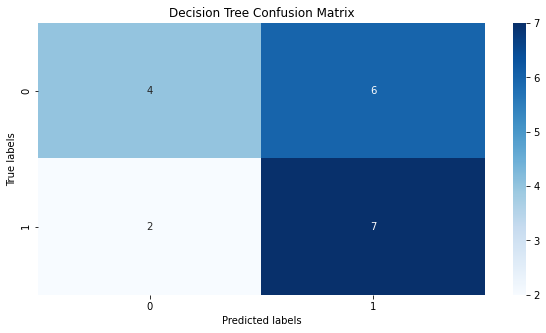

In [44]:
plot_confusion_matrix(y_test, pred, 'Decision Tree')

In [45]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, pred)
acc_score

0.5789473684210527

In [46]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4,6
Actual 1,2,7


Accuracy Score : 0.5789473684210527
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.54      0.78      0.64         9

    accuracy                           0.58        19
   macro avg       0.60      0.59      0.57        19
weighted avg       0.61      0.58      0.56        19



# Random Forest

In [47]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100,random_state=1) 
rf_model

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=1,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [48]:

# Calculated the balanced accuracy score
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)

acc_score = accuracy_score(y_test, predictions)
acc_score

0.7368421052631579

In [76]:
#Fit and predict
rf, y_test, y_pred = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Train score: 0.9439252336448598
Test accuracy: 0.7368421052631579
Difference: 0.20708312838170195


In [49]:

# Calculating the confusion matrix.

confusion_matrix(y_test, predictions)


array([[7, 3],
       [2, 7]], dtype=int64)

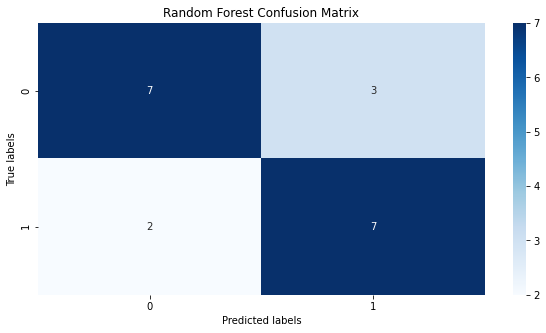

In [50]:
plot_confusion_matrix(y_test, predictions, 'Random Forest')

In [51]:

# Print the imbalanced classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.70      0.78      0.74         9

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



In [52]:
# List the features sorted in descending order by feature importance
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.19440550638860285, 'order_satisfaction'),
 (0.17946793538649922, 'order_completed'),
 (0.17031896409449426, 'delivered_OnTime'),
 (0.1702226553016792, 'courier_satisfaction'),
 (0.1505343344744745, 'price_satisfaction'),
 (0.13505060435424998, 'app_satisfaction')]

# K-Nearest Neighbor

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=6)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [55]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [56]:
print(accuracy_score(y_test, predictions))

0.631578947368421


# Easy Ensemble AdaBoost Classifier

In [57]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)

predictions = eec.predict(X_test)

In [58]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, predictions)

0.6833333333333333

In [59]:
# Display the confusion matrix
y_pred = eec.predict(X_test)
confusion_matrix(y_test, predictions)

array([[7, 3],
       [3, 6]], dtype=int64)

In [60]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.70      0.70      0.67      0.70      0.68      0.47        10
          1       0.67      0.67      0.70      0.67      0.68      0.47         9

avg / total       0.68      0.68      0.68      0.68      0.68      0.47        19



# XgBoost

In [61]:
   import xgboost as xgb

In [62]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
predi= knn.predict(X_test)
print(accuracy_score(y_test, predi))

0.631578947368421


# VOTING CLASSIFIER

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
#import xgboost as xgb
# Decision Tree Classifier

clf1 = DecisionTreeClassifier()

# Random Forest Classifier

clf2 = RandomForestClassifier()

# Extra Trees Classifier

clf3 = ExtraTreesClassifier()

In [64]:
# Create empty lists that will storage the different weights

weights1 = []
weights2 = []
weights3 = []
scores = []

# Create a for loop to evaluate different combinations of weights

for i in np.arange(0.1,1, 0.1):
    for j in np.arange(0.1,1, 0.1):
        for k in np.arange(0.1,1, 0.1):
            clf_voting = VotingClassifier(estimators = [('est1', clf1), ('est2', clf2),
                                           ('est3', clf3)], voting = 'soft', weights = [i, j, k])
            clf_voting.fit(X_train, y_train)
            pred = clf_voting.predict(X_test)
            score = accuracy_score(y_test, pred)
            scores.append(score)
            weights1.append(i)
            weights2.append(j)
            weights3.append(k)

In [65]:
# Save the results in a data frame

test_scores = pd.DataFrame()
test_scores['Weight1'] = weights1
test_scores['Weight2'] = weights2
test_scores['Weight3'] = weights3
test_scores['Test Score'] = scores

# Create an additional column to save the sum of all the weights

test_scores['sum_weights'] = test_scores['Weight1'].add(test_scores['Weight2']).add(test_scores['Weight3'])

#We are only getting the rows that the sum of all weights were equal to one

condition = test_scores['sum_weights'] == 1

test_scores = test_scores.loc[condition]

In [66]:
print(test_scores.sort_values('Test Score', ascending=False))

     Weight1  Weight2  Weight3  Test Score  sum_weights
175      0.3      0.2      0.5    0.736842          1.0
55       0.1      0.7      0.2    0.736842          1.0
87       0.2      0.1      0.7    0.736842          1.0
111      0.2      0.4      0.4    0.736842          1.0
191      0.3      0.4      0.3    0.684211          1.0
39       0.1      0.5      0.4    0.684211          1.0
47       0.1      0.6      0.3    0.684211          1.0
63       0.1      0.8      0.1    0.684211          1.0
247      0.4      0.1      0.5    0.684211          1.0
127      0.2      0.6      0.2    0.684211          1.0
279      0.4      0.5      0.1    0.631579          1.0
271      0.4      0.4      0.2    0.631579          1.0
255      0.4      0.2      0.4    0.631579          1.0
15       0.1      0.2      0.7    0.631579          1.0
183      0.3      0.3      0.4    0.631579          1.0
7        0.1      0.1      0.8    0.631579          1.0
167      0.3      0.1      0.6    0.631579      

In [67]:
def evaluate_model(classifier, X_tr, y_tr, X_te, y_te):
    
    clf = classifier
    clf.fit(X_tr,y_tr)
    y_pr = clf.predict(X_te)
    
    score = clf.score(X_tr, y_tr)
    accuracy = accuracy_score(y_te, y_pr)
    
    print(f'Train score: {score}\nTest accuracy: {accuracy}\nDifference: {score - accuracy}')
    
    return clf, y_te, y_pr

In [68]:
# Create the Voting Classifier with soft voting because all models perform similarly
clf_voting = VotingClassifier(estimators = [('est1', clf1), ('est2', clf2),
                                           ('est3', clf3)], voting = 'hard', weights=[0.4, 0.3, 0.3])
#Fit and predict
vc, y_test, y_pred = evaluate_model(clf_voting, X_train, y_train, X_test, y_test)

Train score: 0.9439252336448598
Test accuracy: 0.6842105263157895
Difference: 0.2597147073290703


In [69]:
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """
    
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

### Confusion Matrix

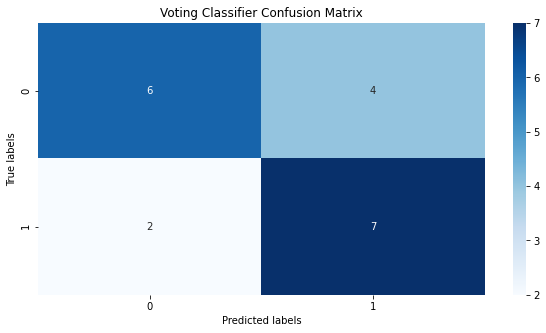

In [70]:
plot_confusion_matrix(y_test, y_pred, 'Voting Classifier')

### Classification Report

In [71]:
print(f'Voting Classifier Classification Report\n\n{classification_report(y_test, y_pred)}')

Voting Classifier Classification Report

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.64      0.78      0.70         9

    accuracy                           0.68        19
   macro avg       0.69      0.69      0.68        19
weighted avg       0.70      0.68      0.68        19



In [72]:
df = pd.DataFrame()
df['Feature'] = X_train.columns
df['Feature Importance'] = compute_feature_importance(clf_voting, [1, 1, 2])
df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
1,order_satisfaction,0.772581
2,order_completed,0.726680
0,delivered_OnTime,0.693913
4,courier_satisfaction,0.663770
3,price_satisfaction,0.572764
5,app_satisfaction,0.570292


Based on our data, order completed had the most impact on customer happiness. However, order satisfaction ratings of 1 also had an impact on customer happiness, followed by delivered on time.

Knowing what action to take/which features are priority to improve will depend on budgetary and time constraints of the company. In this case, I would recommend to continue delivering efficiently or extending the estimated delivery time so that deliveries appear to arrive earlier than planned. This may require further A/B testing to see if this improves the ratings.

Order satisfaction can be improved via more quality control training and should be further investigated as to what is causing incomplete orders.

## CONCLUSION

In conclusion the Random Forest was the best model using the data set with all features. It had the highest train and test accuracy. It also had the highest classification scores with both unhappy and happy customers getting an f1-score of 74%. I chose the Random forest model because the training set had the closest accuracy to the test set.